In [17]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
# plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('inter', 6)
# plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/xusy/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.compare import compare_survival

import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure6/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'


In [3]:
!pip install scikit-survival


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... one
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.8/835.8 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 68.9 MB/s eta 0:00:00
  Created wheel for ecos: filename=ecos-2.0.14-cp310-cp310-macosx_11_0_arm64.whl size=18950 sha256=5a585c793aa43ef90ab725244a3b66345112ac2d812319096a973e65ebabf171
  Stored in directory: /Users/sangyuxu/Library/Caches/pip/wheels/e1/cf/5e/e0839639dc3777967d18c04d65e5233e81049a89259062c081
Successfully built ecos


In [7]:
starve = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/starve.csv',delimiter=',')
starve = starve.set_index('Day')
starvePerc = starve/starve.iloc[1,:]

In [8]:
starve

,R50H05>Chr,W;R50H05,Trh>Chr,W;Trh,W;Chr,Trh>VNC-Chr,W;VNC-Chr,Trh>ACR1
Day,,,,,,,,
0,50,25,87,25,40,49,24,15
1,50,25,87,25,40,49,24,15
2,22,20,73,25,38,48,24,12
3,0,2,5,13,6,37,14,3
4,0,0,0,0,0,14,1,0
5,0,0,0,0,0,0,0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because

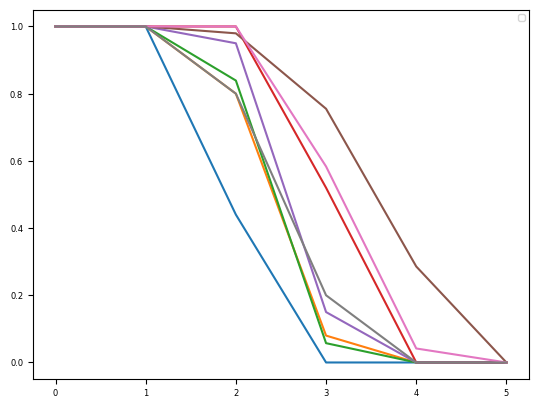

In [9]:
plt.plot(starvePerc)
plt.legend()

In [12]:
starve1 = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/starve.csv',delimiter=',')
df = pd.melt(starve1, id_vars=['Day'], value_vars= starve1.columns[1::], value_name='count', var_name = 'genotype')
df['total'] = [df.loc[df['genotype'] == df.iloc[n]['genotype']]['count'].max() for n in range(len(df))]
df1 = pd.DataFrame(np.nan, index=df.index, columns=np.arange(0, df.total.max(), 1))
for i in range(len(df1)):
    success = df.iloc[i]['count']
    total = df.iloc[i]['total']
    binString = np.zeros(total)
    binString[0:success] = 1
    df1.iloc[i, 0:total] = binString
df_t = pd.concat([df, df1], axis = 1)
df_t_melt = pd.melt(df_t, id_vars = df.columns, value_vars = df1.columns, value_name = 'success').rename(columns = {'variable': 'ID'})
df_t_melt['genotype_day'] = df_t_melt['genotype']+ '_'+df_t_melt['Day'].astype('str')
df_t_melt_pivot = df_t_melt.pivot(index='ID', columns='genotype_day', values='success').reset_index()

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_19119/2910437028.py:14: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_t_melt_pivot = df_t_melt.pivot(index='ID', columns='genotype_day', values='success').reset_index()


In [13]:
df_t_melt_pivot

genotype_day,ID,R50H05>Chr_0,R50H05>Chr_1,R50H05>Chr_2,R50H05>Chr_3,R50H05>Chr_4,R50H05>Chr_5,Trh>ACR1_0,Trh>ACR1_1,Trh>ACR1_2,...,W;Trh_2,W;Trh_3,W;Trh_4,W;Trh_5,W;VNC-Chr_0,W;VNC-Chr_1,W;VNC-Chr_2,W;VNC-Chr_3,W;VNC-Chr_4,W;VNC-Chr_5
0,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because

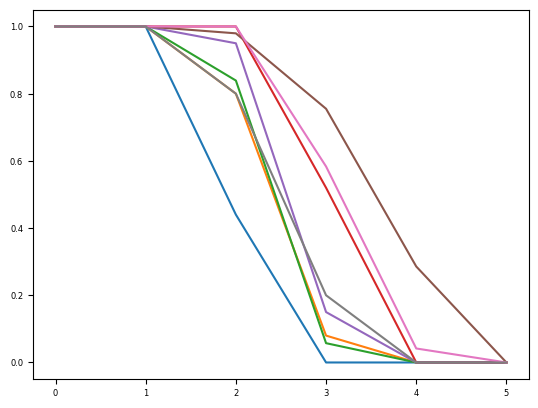

In [14]:
df_std = df_t_melt_pivot.std()
df_std
starvePerc_ste = starvePerc.copy()
starvePerc_std = starvePerc.copy()
for i in range(6):
    for j in starvePerc.columns:
        starvePerc_std.loc[i, j] = (df_std[j+'_'+str(i)])
        starvePerc_ste.loc[i, j] = (df_std[j+'_'+str(i)])/np.sqrt(starve.loc[0][j])
        
starvePerc_ste
plt.plot(starvePerc)



,Sample,nc82 Intensity,5HT Intensity,Normalized 5HT intensity,Region,Starvation,Round
0,F1,324.345,150.933,0.465347,VNC,Fed,1
1,F2,532.432,317.598,0.596504,VNC,Fed,1
2,F3,452.649,354.118,0.782324,VNC,Fed,1
3,F4,509.532,412.707,0.809973,VNC,Fed,1
4,S1,432.221,409.904,0.948367,VNC,Starved,1
5,S2,224.650,412.711,1.837129,VNC,Starved,1
6,S3,296.736,293.081,0.987683,VNC,Starved,1
7,S4,249.923,393.336,1.573829,VNC,Starved,1
8,F1,530.305,397.621,0.749797,Brain,Fed,1
9,F2,442.300,233.438,0.527782,Brain,Fed,1


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSepara

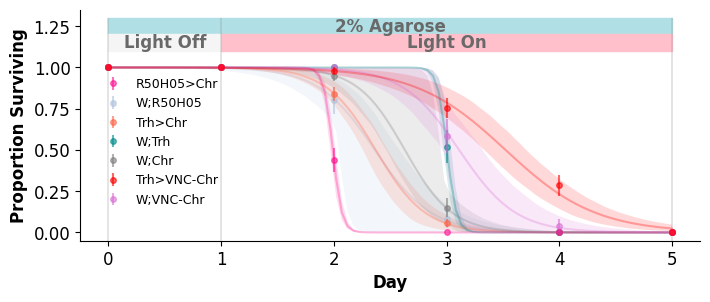

In [20]:
setFont('inter', 12)

f = plt.figure(figsize = (8, 3))
palette = {'R50H05>Chr':'deeppink', 'W;R50H05':'lightsteelblue', 'Trh>Chr':'tomato', 'W;Trh':'darkcyan', 'W;Chr':'gray', 'Trh>VNC-Chr':'red',
       'W;VNC-Chr':'orchid'}
zorder_list = {0: 10, 1:1, 2:2, 3:3, 4:4, 5:20, 6:6}
for i in range(7):
    df_t_sub = df_t.loc[df_t.genotype==starvePerc.columns[i]].drop(['genotype', 'count', 'total'], axis = 1)
    df_t_sub_melt = df_t_sub.melt(id_vars=['Day'], value_vars=df_t_sub.columns[1::])
    g = sns.regplot(x="Day", y="value", data=df_t_sub_melt, logistic=True, color = palette[starvePerc.columns[i]], 
                    scatter = False, line_kws={'alpha': 0.3, 'zorder':zorder_list[i], 'linewidth':1.5})
for i in range(7):
    plt.errorbar(starvePerc.index, starvePerc.iloc[:, i], yerr=starvePerc_ste.iloc[:, i], fmt='o',
                 markersize = 4, alpha = .6, color = palette[starvePerc.columns[i]], 
                 label = starvePerc.columns[i], zorder = zorder_list[i])
f.axes[0].plot([0, 0], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([1, 1], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([5, 5], [1.3, -0.05], color = 'gray', linewidth = 0.3 )

rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )
f.axes[0].add_patch(rect1)
f.axes[0].add_patch(rect2)
f.axes[0].add_patch(rect3)
f.axes[0].set_ylim(-0.05, 1.35)
f.axes[0].spines[['right', 'top']].set_visible(False)
f.axes[0].text(0.5, 1.15, 'Light Off', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(3, 1.15, 'Light On', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(2.5, 1.25, '2% Agarose', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
plt.legend(fontsize = 9, loc='lower left', bbox_to_anchor=(.015, .1), frameon = False)
plt.ylabel('Proportion Surviving', weight = 'bold')
plt.xlabel('Day', weight = 'bold')
plt.savefig('starvecurve.png', dpi = 300)
plt.savefig(figurepath+'/images/starvecurve.svg', bbox_inches = 'tight')
# plt.savefig(figurepath+'/images/starvecurve.svg')


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSepara

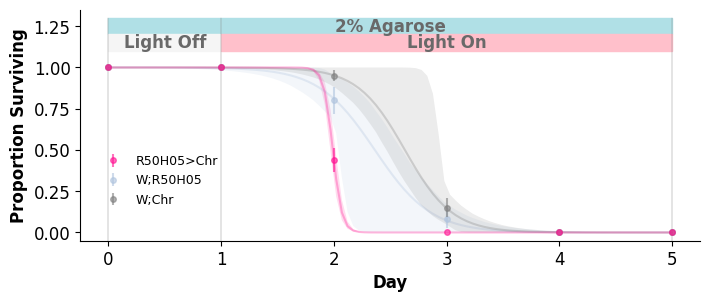

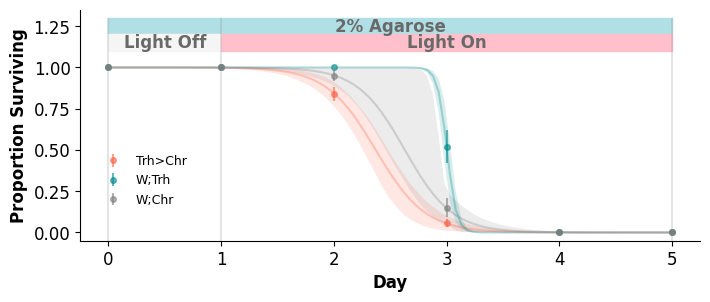

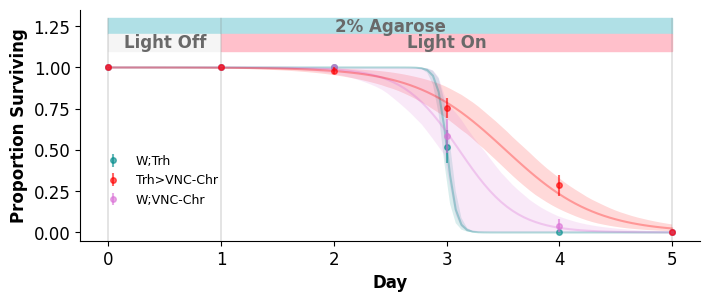

In [35]:
setFont('inter', 12)

f = plt.figure(figsize = (8, 3))
palette = {'R50H05>Chr':'deeppink', 'W;R50H05':'lightsteelblue', 'Trh>Chr':'tomato', 'W;Trh':'darkcyan', 'W;Chr':'gray', 'Trh>VNC-Chr':'red',
       'W;VNC-Chr':'orchid'}
zorder_list = {0: 10, 1:1, 2:2, 3:3, 4:4, 5:20, 6:6}
for i in [0, 1, 4]:
    df_t_sub = df_t.loc[df_t.genotype==starvePerc.columns[i]].drop(['genotype', 'count', 'total'], axis = 1)
    df_t_sub_melt = df_t_sub.melt(id_vars=['Day'], value_vars=df_t_sub.columns[1::])
    g = sns.regplot(x="Day", y="value", data=df_t_sub_melt, logistic=True, color = palette[starvePerc.columns[i]], 
                    scatter = False, line_kws={'alpha': 0.3, 'zorder':zorder_list[i], 'linewidth':1.5})
for i in [0, 1, 4]:
    plt.errorbar(starvePerc.index, starvePerc.iloc[:, i], yerr=starvePerc_ste.iloc[:, i], fmt='o',
                 markersize = 4, alpha = .6, color = palette[starvePerc.columns[i]], 
                 label = starvePerc.columns[i], zorder = zorder_list[i])
f.axes[0].plot([0, 0], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([1, 1], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([5, 5], [1.3, -0.05], color = 'gray', linewidth = 0.3 )

rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )
f.axes[0].add_patch(rect1)
f.axes[0].add_patch(rect2)
f.axes[0].add_patch(rect3)
f.axes[0].set_ylim(-0.05, 1.35)
f.axes[0].spines[['right', 'top']].set_visible(False)
f.axes[0].text(0.5, 1.15, 'Light Off', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(3, 1.15, 'Light On', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(2.5, 1.25, '2% Agarose', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
plt.legend(fontsize = 9, loc='lower left', bbox_to_anchor=(.015, .1), frameon = False)
plt.ylabel('Proportion Surviving', weight = 'bold')
plt.xlabel('Day', weight = 'bold')
plt.savefig('starvecurve.png', dpi = 300)
plt.savefig(figurepath+'/images/starvecurve_R50.svg', bbox_inches = 'tight')
# plt.savefig(figurepath+'/images/starvecurve.svg')



f = plt.figure(figsize = (8, 3))
palette = {'R50H05>Chr':'deeppink', 'W;R50H05':'lightsteelblue', 'Trh>Chr':'tomato', 'W;Trh':'darkcyan', 'W;Chr':'gray', 'Trh>VNC-Chr':'red',
       'W;VNC-Chr':'orchid'}
zorder_list = {0: 10, 1:1, 2:2, 3:3, 4:4, 5:20, 6:6}
for i in [2, 3, 4]:
    df_t_sub = df_t.loc[df_t.genotype==starvePerc.columns[i]].drop(['genotype', 'count', 'total'], axis = 1)
    df_t_sub_melt = df_t_sub.melt(id_vars=['Day'], value_vars=df_t_sub.columns[1::])
    g = sns.regplot(x="Day", y="value", data=df_t_sub_melt, logistic=True, color = palette[starvePerc.columns[i]], 
                    scatter = False, line_kws={'alpha': 0.3, 'zorder':zorder_list[i], 'linewidth':1.5})
for i in [2, 3, 4]:
    plt.errorbar(starvePerc.index, starvePerc.iloc[:, i], yerr=starvePerc_ste.iloc[:, i], fmt='o',
                 markersize = 4, alpha = .6, color = palette[starvePerc.columns[i]], 
                 label = starvePerc.columns[i], zorder = zorder_list[i])
f.axes[0].plot([0, 0], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([1, 1], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([5, 5], [1.3, -0.05], color = 'gray', linewidth = 0.3 )

rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )
f.axes[0].add_patch(rect1)
f.axes[0].add_patch(rect2)
f.axes[0].add_patch(rect3)
f.axes[0].set_ylim(-0.05, 1.35)
f.axes[0].spines[['right', 'top']].set_visible(False)
f.axes[0].text(0.5, 1.15, 'Light Off', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(3, 1.15, 'Light On', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(2.5, 1.25, '2% Agarose', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
plt.legend(fontsize = 9, loc='lower left', bbox_to_anchor=(.015, .1), frameon = False)
plt.ylabel('Proportion Surviving', weight = 'bold')
plt.xlabel('Day', weight = 'bold')
plt.savefig('starvecurve.png', dpi = 300)
plt.savefig(figurepath+'/images/starvecurve_Trh.svg', bbox_inches = 'tight')

f = plt.figure(figsize = (8, 3))
palette = {'R50H05>Chr':'deeppink', 'W;R50H05':'lightsteelblue', 'Trh>Chr':'tomato', 'W;Trh':'darkcyan', 'W;Chr':'gray', 'Trh>VNC-Chr':'red',
       'W;VNC-Chr':'orchid'}
zorder_list = {0: 10, 1:1, 2:2, 3:3, 4:4, 5:20, 6:6}
for i in [3, 5, 6]:
    df_t_sub = df_t.loc[df_t.genotype==starvePerc.columns[i]].drop(['genotype', 'count', 'total'], axis = 1)
    df_t_sub_melt = df_t_sub.melt(id_vars=['Day'], value_vars=df_t_sub.columns[1::])
    g = sns.regplot(x="Day", y="value", data=df_t_sub_melt, logistic=True, color = palette[starvePerc.columns[i]], 
                    scatter = False, line_kws={'alpha': 0.3, 'zorder':zorder_list[i], 'linewidth':1.5})
for i in [3, 5, 6]:
    plt.errorbar(starvePerc.index, starvePerc.iloc[:, i], yerr=starvePerc_ste.iloc[:, i], fmt='o',
                 markersize = 4, alpha = .6, color = palette[starvePerc.columns[i]], 
                 label = starvePerc.columns[i], zorder = zorder_list[i])
f.axes[0].plot([0, 0], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([1, 1], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([5, 5], [1.3, -0.05], color = 'gray', linewidth = 0.3 )

rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )
f.axes[0].add_patch(rect1)
f.axes[0].add_patch(rect2)
f.axes[0].add_patch(rect3)
f.axes[0].set_ylim(-0.05, 1.35)
f.axes[0].spines[['right', 'top']].set_visible(False)
f.axes[0].text(0.5, 1.15, 'Light Off', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(3, 1.15, 'Light On', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(2.5, 1.25, '2% Agarose', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
plt.legend(fontsize = 9, loc='lower left', bbox_to_anchor=(.015, .1), frameon = False)
plt.ylabel('Proportion Surviving', weight = 'bold')
plt.xlabel('Day', weight = 'bold')
plt.savefig('starvecurve.png', dpi = 300)
plt.savefig(figurepath+'/images/starvecurve_TrhV.svg', bbox_inches = 'tight')




/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_19119/3609924361.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brain['Normalized 5HT intensity'] = brain['Normalized 5HT intensity']/basemean
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 10.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_19119/3609924361.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

0.7306148769399999


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 9.1% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


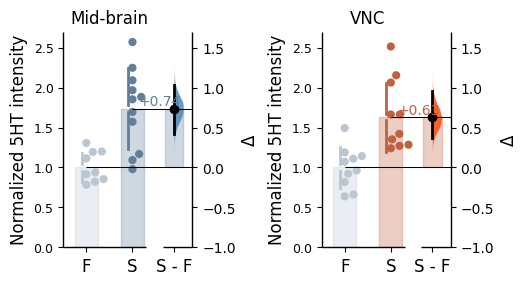

In [105]:
import dabest
import pandas
setFont('inter', 9)
f, axes = plt.subplots(nrows=1, ncols=2,
                      figsize=(5, 2.8),
                      gridspec_kw={'wspace': 1, 'hspace': .5} # ensure proper width-wise spacing.
                     )
fedstarved = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/Fed_Starved.csv',delimiter=',')
fedstarved.columns
setFont('inter', 10)
fedstarved
brain = fedstarved.loc[fedstarved['Region']== 'Brain']
basemean = brain.loc[brain['Starvation'] == 'Fed']['Normalized 5HT intensity'].mean()
brain['Normalized 5HT intensity'] = brain['Normalized 5HT intensity']/basemean
brain_nc82_contrast = dabest.load(brain, x = 'Starvation', y = 'Normalized 5HT intensity', idx = ('Fed', 'Starved'))
fbrain = brain_nc82_contrast.mean_diff.plot(fig_size = (4,3), swarm_ylim = [0, 2.7], ax = axes[0], 
                                  custom_palette = {'Fed':'lightsteelblue', 'Starved':'steelblue'},
                                  es_marker_size = 6);


vnc = fedstarved.loc[fedstarved['Region']== 'VNC']
basemean = vnc.loc[vnc['Starvation'] == 'Fed']['Normalized 5HT intensity'].mean()
print(basemean)
vnc['Normalized 5HT intensity'] = vnc['Normalized 5HT intensity']/basemean
vnc_nc82_contrast = dabest.load(vnc, x = 'Starvation', y = 'Normalized 5HT intensity', idx = ('Fed', 'Starved'))
fvnc = vnc_nc82_contrast.mean_diff.plot(fig_size = (4,3), swarm_ylim = [0, 2.7], ax = axes[1], 
                                  custom_palette = {'Fed':'lightsteelblue', 'Starved':'orangered'},
                                  es_marker_size = 6);
vnc_5ht_contrast = dabest.load(vnc, x = 'Starvation', y = '5HT Intensity', idx = ('Fed', 'Starved'))
titles = ['Mid-brain','VNC']
f.axes[0].set_xticklabels(['F', 'S']) 
f.axes[0].contrast_axes.set_xticklabels(['', 'S - F']) 
f.axes[1].set_xticklabels(['F', 'S']) 
f.axes[1].contrast_axes.set_xticklabels(['', 'S - F']) 
f.axes[0].contrast_axes.set_ylabel('$\Delta$') 
f.axes[1].contrast_axes.set_ylabel('$\Delta$') 




for i in range(len(axes.flatten())):
    axes.flatten()[i].set_title(titles[i], ha = 'center')
f.savefig(figurepath+'/images/5htnorm.png', dpi = 300)
f.savefig(figurepath+'/images/5htnorm.svg')



In [161]:
rnaidf['StatusExpt'].unique()

array(['Ctrl_TrhTrhi_Combined Controls', 'Test_TrhTrhi_Trh-Gal4>RNAi',
       'Ctrl_TrhGluti_Combined Controls', 'Test_TrhGluti_Trh-Gal4>GLuti',
       'Ctrl_TrhSut2i_Combined Controls', 'Test_TrhSut2i_Trh-Gal4>Sut2i',
       'Ctrl_TrhVTrhi_Combined Controls',
       'Test_TrhVTrhi_TrhVNC-Gal4>Trhi',
       'Ctrl_TrhVGluti_Combined Controls',
       'Test_TrhVGluti_TrhVNC-Gal4>Gluti',
       'Ctrl_TrhVSut2i_Combined Controls',
       'Test_TrhVSut2i_TrhVNC-Gal4>Sut2i'], dtype=object)

# RNAi Data

In [37]:
metapath = paperpath + 'DataforFigures/Behavior/Data/Figure6exptMeta.csv'
fullMetaData = pd.read_csv(metapath)
dataDict=dict()
stateDict = {'24':'Starved','48':'Starved', '0':'Fed'}

for i in range(len(fullMetaData)):
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = 'Status')
    data['Starvation'] = data['Starvation'].round().astype('str')
    dataDict[fullMetaData.iloc[i, 0] ]= data
    fullMetaData.iloc[i, -3] = data['Starvation'][0]
    fullMetaData.iloc[i, -2] = stateDict[data['Starvation'][0]]
    fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Test'])

print(fullMetaData)


,Expt,File,Group,Delta Type,Starved Hours,State,Test Sample Size
0,w1118,W1118Dark_ele.csv,wt,delta,0,Fed,0.0
1,w1118,W1118Dark_ele.csv,wt,delta,0,Fed,0.0
2,w1118,W1118Dark_ele.csv,wt,delta,0,Fed,0.0
3,w1118,W1118Dark_ele.csv,wt,delta,0,Fed,0.0
4,w1118,W1118Dark_ele.csv,wt,delta,0,Fed,0.0
5,TrhTrhi,TrhTrhi_ele.csv,RNAi,delta,0,Fed,30.0
6,TrhGluti,TrhGluti_ele.csv,RNAi,delta,0,Fed,36.0
7,TrhSut2i,TrhSut2i_ele.csv,RNAi,delta,0,Fed,28.0
8,TrhVTrhi,TrhVTrhi_ele.csv,RNAi,delta,0,Fed,36.0
9,TrhVGluti,TrhVGluti_ele.csv,RNAi,delta,0,Fed,28.0


['Ctrl_TrhTrhi_Combined Controls' 'Test_TrhTrhi_Trh-Gal4>Trhi'
 'Ctrl_TrhGluti_Combined Controls' 'Test_TrhGluti_Trh-Gal4>GLuti'
 'Ctrl_TrhSut2i_Combined Controls' 'Test_TrhSut2i_Trh-Gal4>Sut2i'
 'Ctrl_TrhVTrhi_Combined Controls' 'Test_TrhVTrhi_TrhVNC-Gal4>Trhi'
 'Ctrl_TrhVGluti_Combined Controls' 'Test_TrhVGluti_TrhVNC-Gal4>Gluti'
 'Ctrl_TrhVSut2i_Combined Controls' 'Test_TrhVSut2i_TrhVNC-Gal4>Sut2i']
0        Ctrl_TrhTrhi_Combined Controls
63       Ctrl_TrhTrhi_Combined Controls
62       Ctrl_TrhTrhi_Combined Controls
61       Ctrl_TrhTrhi_Combined Controls
60       Ctrl_TrhTrhi_Combined Controls
                     ...               
37     Test_TrhVSut2i_TrhVNC-Gal4>Sut2i
36     Test_TrhVSut2i_TrhVNC-Gal4>Sut2i
35     Test_TrhVSut2i_TrhVNC-Gal4>Sut2i
49     Test_TrhVSut2i_TrhVNC-Gal4>Sut2i
135    Test_TrhVSut2i_TrhVNC-Gal4>Sut2i
Name: StatusExpt, Length: 519, dtype: object


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 25.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


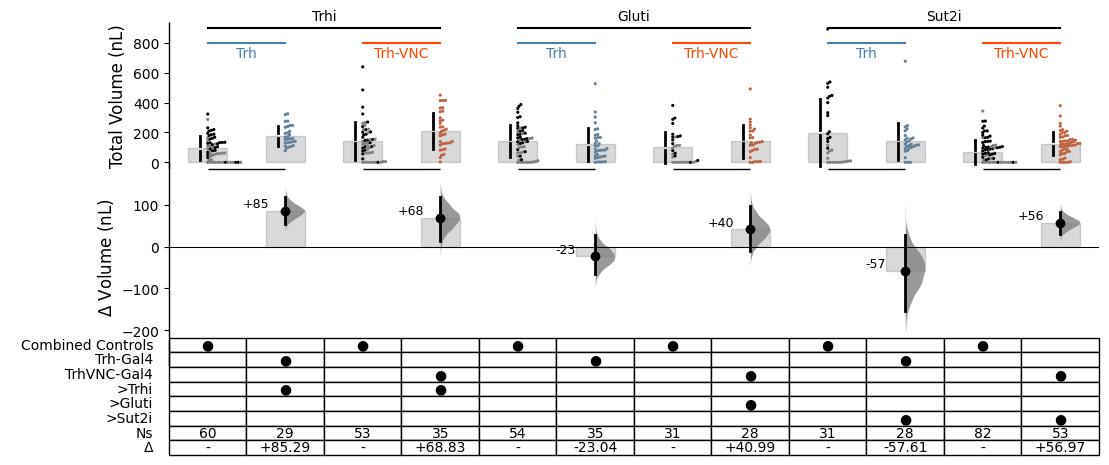

In [206]:
# fig6b, axes = plt.subplots(2, 3, figsize = [12, 6])
%run 001_ContrastPlotkwargs.ipynb
setFont('inter', 10)
rnaidata = []
for i in fullMetaData.index:
    if fullMetaData.loc[i, 'Expt'] !='w1118':
        data = dataDict[fullMetaData.iloc[i, 0]]
        data['Expt'] = fullMetaData.loc[i, 'Expt']
        rnaidata.append(data)
rnaidf = pd.concat(rnaidata)

rnaidf = rnaidf.drop(rnaidf.loc[rnaidf['Genotype']=='empty'].index)
rnaidf['Volume'] = rnaidf['Volume'] *1000
rnaidf['GenoReduced'] =rnaidf['Genotype'].replace({'w1118; uas-trhi':'UAS/W', 'w1118; trh-gal4':'Trh-Gal4/W', 
                                                   'trh-gal4>uas-trhi':'Trh-Gal4>Trhi',
       'w1118; uas-gluti40904':'UAS/W', 'trh-gal4>uas-gluti40904':'Trh-Gal4>GLuti',
       'w1118; uas-sut2rnai':'UAS/W', 'trh-gal4>uas-sut2rnai':'Trh-Gal4>Sut2i',
       'w1118; trhvnc-gal4':'TrhVNC-Gal4/W', 'trh-vnc-gal4>uas-trhrnai':'TrhVNC-Gal4>Trhi',
       'trhvnc-gal4<uas-gluti40904':'TrhVNC-Gal4>Gluti', 'trh-vnc-gal4>uas-sut2rnai':'TrhVNC-Gal4>Sut2i'})
rnaidf.loc[rnaidf['Status'] == 'Ctrl', 'GenoReduced'] = 'Combined Controls'
rnaidf['GenoReduced']
rnaidf['StatusExpt'] = rnaidf['Status'] + '_' + rnaidf['Expt'] + '_'+rnaidf['GenoReduced']
print(rnaidf['StatusExpt'].unique())
idx  = (('Ctrl_TrhTrhi_Combined Controls', 'Test_TrhTrhi_Trh-Gal4>Trhi'), ('Ctrl_TrhVTrhi_Combined Controls', 'Test_TrhVTrhi_TrhVNC-Gal4>Trhi'), 
        ('Ctrl_TrhGluti_Combined Controls', 'Test_TrhGluti_Trh-Gal4>GLuti'),('Ctrl_TrhVGluti_Combined Controls', 'Test_TrhVGluti_TrhVNC-Gal4>Gluti'),
       ('Ctrl_TrhSut2i_Combined Controls', 'Test_TrhSut2i_Trh-Gal4>Sut2i'),  ('Ctrl_TrhVSut2i_Combined Controls','Test_TrhVSut2i_TrhVNC-Gal4>Sut2i'))
rnaipalette = {'Ctrl_TrhTrhi_Combined Controls':'gray', 'Test_TrhTrhi_Trh-Gal4>Trhi':'steelblue', 'Ctrl_TrhVTrhi_Combined Controls':'gray', 'Test_TrhVTrhi_TrhVNC-Gal4>Trhi':'orangered',
               'Ctrl_TrhGluti_Combined Controls':'gray', 'Test_TrhGluti_Trh-Gal4>GLuti':'steelblue', 'Ctrl_TrhVGluti_Combined Controls':'gray', 'Test_TrhVGluti_TrhVNC-Gal4>Gluti':'orangered', 
       'Ctrl_TrhSut2i_Combined Controls':'gray', 'Test_TrhSut2i_Trh-Gal4>Sut2i':'steelblue', 'Ctrl_TrhVSut2i_Combined Controls':'gray', 'Test_TrhVSut2i_TrhVNC-Gal4>Sut2i':'orangered'}
rnaigenopalette = {'w1118; uas-trhi':'gray', 'w1118; trh-gal4':'k', 'trh-gal4>uas-trhi':'steelblue',
       'w1118; uas-gluti40904':'gray', 'trh-gal4>uas-gluti40904':'steelblue',
       'w1118; uas-sut2rnai':'gray', 'trh-gal4>uas-sut2rnai':'steelblue',
       'w1118; trhvnc-gal4':'k', 'trh-vnc-gal4>uas-trhrnai':'orangered',
       'trhvnc-gal4<uas-gluti40904':'orangered', 'trh-vnc-gal4>uas-sut2rnai':'orangered'}
rnaigenoreducedpalette = {'UAS/W':'gray', 'Trh-Gal4/W':'k', 'Trh-Gal4>RNAi':'steelblue',
       'TrhVNC-Gal4/W':'k', 'TrhVNC-Gal4>RNAi':'orangered',}
print(rnaidf.StatusExpt)

rnaiC= dabest.load(rnaidf, x = 'StatusExpt', y = 'Volume', idx = idx)
frnaiC = rnaiC.mean_diff.plot(color_col = 'Genotype', 
                              fig_size=(12, 4), 
                              custom_palette= rnaigenopalette, 
                              delta_text_kwargs =dt_kwargs, 
                              contrast_bars_kwargs= cb_kwargs,
                              swarm_bars_kwargs= sb_kwargs,
                              raw_marker_size=rm_size,  
                              es_marker_size= es_size,
                             gridkey_rows=['Combined Controls', 'Trh-Gal4', 'TrhVNC-Gal4', '>Trhi', '>Gluti', '>Sut2i',] )
frnaiC.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test'])
frnaiC.axes[1].set_xticklabels(['', 'Test - Ctrl', '', 'Test - Ctrl', '', 'Test - Ctrl','', 'Test - Ctrl', '', 'Test - Ctrl','', 'Test - Ctrl',])
frnaiC.axes[0].plot([0, 1], [800, 800], color = 'steelblue')
frnaiC.axes[0].plot([2, 3], [800, 800], color = 'orangered')
frnaiC.axes[0].plot([4, 5], [800, 800], color = 'steelblue')
frnaiC.axes[0].plot([6, 7], [800, 800], color = 'orangered')
frnaiC.axes[0].plot([8, 9], [800, 800], color = 'steelblue')
frnaiC.axes[0].plot([10, 11], [800, 800], color = 'orangered')
frnaiC.axes[0].plot([0, 3], [900, 900], color = 'k')
frnaiC.axes[0].plot([4, 7], [900, 900], color = 'k')
frnaiC.axes[0].plot([8, 11], [900, 900], color = 'k')
frnaiC.axes[0].text(.5, 700, 'Trh', ha =  'center', color = 'steelblue')
frnaiC.axes[0].text(2.5, 700, 'Trh-VNC', ha =  'center', color = 'orangered')
frnaiC.axes[0].text(4.5, 700, 'Trh', ha =  'center', color = 'steelblue')
frnaiC.axes[0].text(6.5, 700, 'Trh-VNC', ha =  'center', color = 'orangered')
frnaiC.axes[0].text(8.5, 700, 'Trh', ha =  'center', color = 'steelblue')
frnaiC.axes[0].text(10.5, 700, 'Trh-VNC', ha =  'center', color = 'orangered')
frnaiC.axes[0].text(1.5, 950, 'Trhi', ha =  'center', color = 'k')
frnaiC.axes[0].text(5.5, 950, 'Gluti', ha =  'center', color = 'k')
frnaiC.axes[0].text(9.5, 950, 'Sut2i', ha =  'center', color = 'k')
frnaiC.axes[0].set_ylabel('Total Volume (nL)')
frnaiC.axes[1].set_ylabel('$\Delta$ Volume (nL)')
frnaiC.axes[1].set_ylim(-200, 150)
rnaidf.to_csv(figurepath+'/rnaidf.csv')
for i in range(33, 39):
    frnaiC.axes[1].get_children()[i].set_text(frnaiC.axes[1].get_children()[i].get_text()[0:-3])
for i in range(19, 25):
    frnaiC.axes[1].get_children()[i].set_visible(False)
frnaiC.tight_layout(w_pad=12)
frnaiC.savefig(figurepath+'/images/RNAi.svg', bbox_inches='tight')
frnaiC.savefig(figurepath+'/images/RNAi.png', dpi = 300, bbox_inches='tight')

In [229]:
from svgutils.compose import *

Figure("20cm", "25cm", 
    Panel(SVG('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202/Figure7/ClusterCorrelation_alt.svg').scale(0.019),
    Text("B", 0, 1.2, size=0.4, font = 'inter', weight='bold'), ).move(0.5, 7.3),   

    Panel(SVG(figurepath +'/images/RNAi.svg').scale(0.023),
    Text("A", 0.5, .2, size=0.4, font = 'inter', weight='bold')).move(0, .5),
    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(4.3, 1.5),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(4.3 + 2.55, 1.5),
    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(4.3 + 2.55*2, 1.5),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(4.3 + 2.55*3, 1.5),
    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(4.3 + 2.55*4, 1.5),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(4.3 + 2.55*5, 1.5),
    Panel(SVG('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202/Figure7/corrMatrix_48.svg').scale(0.022),          
    Text("C", -0.3, .3, size=0.4, font = 'inter', weight='bold'), 
    Text("D", -0.3, 3.4, size=0.4, font = 'inter', weight='bold')).move(10.5, 8.2),       
    Panel(SVG(figurepath +'/images/5htnorm.svg').scale(0.020),
    Text("E", 0, .2, size=0.4, font = 'inter', weight='bold'), 
    Text("F", 4, .2, size=0.4, font = 'inter', weight='bold')).move(10.5, 14.8),
    Panel(SVG(figurepath +'/images/brainsimple.svg').scale(0.0015)).move(11.5, 15.6),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(15.2, 15.6),
    Panel(SVG(figurepath +'/fig6Summary.svg').scale(0.032),
    Text("G", 0, .2, size=0.4, font = 'inter', weight='bold'), ).move(.5, 19),
      
).save(figurepath + "Figure6_alt_alt.svg")










##### 

In [ ]:
from svgutils.compose import *

Figure("16cm", "20cm", 
    Panel(SVG(figurepath +'/images/starvecurve.svg').scale(0.016),
    Text("a", 0, .2, size=0.4, font = 'Inter', weight='bold'),).move(0, .5),
    Panel(SVG(figurepath +'/images/KMCurve.svg').scale(0.018),
    Text("b", 0, .2, size=0.4, font = 'Inter', weight='bold'),).move(8.8, .5),
    Panel(SVG(figurepath +'/images/5htnorm.svg').scale(0.016),
    Text("c", 0, .2, size=0.4, font = 'inter', weight='bold'), 
    Text("d", 4.5, .2, size=0.4, font = 'inter', weight='bold')).move(0, 3.8),
    Panel(SVG(figurepath +'/images/brainsimple.svg').scale(0.0015)).move(1.3, 4.1),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(5.6, 4.1),
    Panel(SVG(figurepath +'/images/RNAi.svg').scale(0.023),
    Text("e", 0, .2, size=0.4, font = 'inter', weight='bold')).move(0, 7.5),
    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(1.95, 8.6),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(1.95 + 2.15, 8.6),
    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(1.95 + 2.15*2, 8.6),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(1.95 + 2.15*3, 8.6),
    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(1.95 + 2.15*4, 8.6),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(1.95 + 2.15*5, 8.6),
    Panel(SVG(figurepath +'/fig6Summary.svg').scale(0.026),
    Text("f", 0, .2, size=0.4, font = 'inter', weight='bold'), ).move(0, 15),
).save(figurepath + "Figure6_alt.svg")










In [49]:
figurepath

'/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202//Figure6/'